### Optical Fiber Models

#### Channel model

\begin{align}
    \textbf{x}_k = \begin{cases}
        \textbf{x}_{k-1} \exp \left(j \frac{L \gamma |\textbf{x}_{k-1}|^2}{K} \right) + \textbf{n}_k  &\text{for}\: 1 \leq k < K \\
        \textbf{x}  &\text{for}\: k = 0
    \end{cases}
\end{align}

where $\textbf{x} \in \mathbb{C}^N$ is the channel input, and $\textbf{y} = \textbf{x}_K$ is the channel output, $\textbf{n}_k \sim \mathcal{CN}\left(\textbf{0}, \frac{\sigma_n^2}{K}\right)$. 

#### Parameters
\begin{align}
    M &= 16 \\
    L &= 5000km \\
    \gamma &= 1.27 W/km \\
    K &= 50
\end{align}

In [1]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

Create QAM constellation

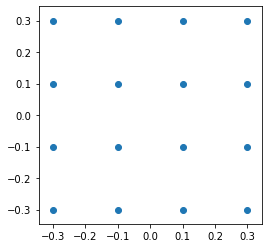

In [2]:
qam_map = np.array(list(product([-3, -1, +1, +3], repeat=2)))
qam_sym_pow = np.mean(np.sum(qam_map * qam_map, axis=1))
qam_map = 1.0 / qam_sym_pow * qam_map

fig = plt.figure(figsize=(4,4))
plt.scatter(qam_map[:,0], qam_map[:,1])

In [3]:
L = 5e3
gamma = 1.27
K = 50

In [4]:
def transmit(sym, noise_pow, L = 5e3, gamma = 1.27, K = 50):
    n = sym.shape[0]
    y = sym.copy()
    
    # exp const
    ec = np.exp(-1j * gamma * L / K)
    
    for i in range(K):
        # Compute power
        p = np.absolute(y) ** 2
        y = y * np.power(ec, p) + np.sqrt(noise_pow/2/K) * (np.random.normal(size=y.shape) + 1j * np.random.normal(size=y.shape))
        
    return y

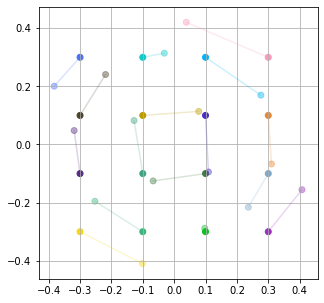

In [5]:
const = qam_map[:, 0] + 1j * qam_map[:, 1]
rx_sym = transmit(const, noise_pow = 0.0001, L = L, gamma = gamma, K = K)

fig = plt.figure(figsize=(5,5))
clr = np.random.random(size = (const.shape[0], 3))
for idx, (tx, rx) in enumerate(zip(const, rx_sym)):
    plt.plot([np.real(tx), np.real(rx)], [np.imag(tx), np.imag(rx)], c=clr[idx], alpha=0.2)
plt.scatter(np.real(const), np.imag(const), c=clr)
plt.scatter(np.real(rx_sym), np.imag(rx_sym), c=clr, alpha=0.4)
plt.grid()

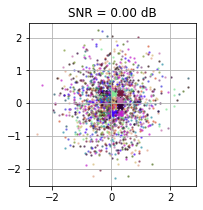

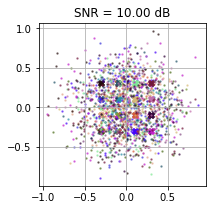

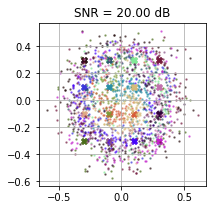

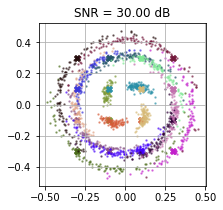

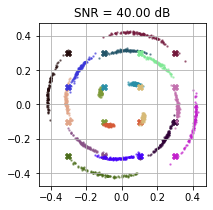

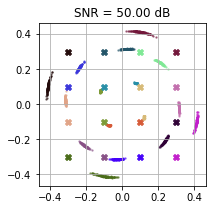

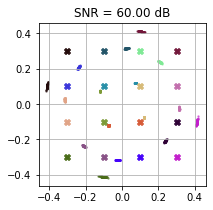

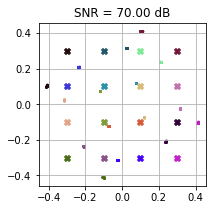

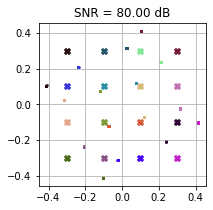

In [6]:
clr = np.random.random(size=(const.shape[0], 3))

snr_dB = np.arange(0, 81, 10.0)

tx_sym_idx = np.random.choice(const.shape[0], size=1600)
tx_sym = const[tx_sym_idx]

for _snr in snr_dB:
    noise_pow = 10.0**(-_snr/10.0)
    rx_sym = transmit(tx_sym, noise_pow = noise_pow, L = L, gamma = gamma, K = K)

    fig = plt.figure(figsize=(3, 3))
    for sym_id in range(const.shape[0]):
        rx_points = rx_sym[tx_sym_idx == sym_id]
        plt.scatter(np.real(rx_points), np.imag(rx_points), c=clr[sym_id].reshape(1, -1), alpha=0.5, s=2)
        plt.scatter(np.real(const[sym_id]), np.imag(const[sym_id]), c=[clr[sym_id]], marker='X')
    plt.grid()
    plt.title("SNR = {:.2f} dB".format(_snr))